In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('2.0-Mushroom_Dataset.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
label_encoders = {}
for column in data.columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [6]:
X = data.drop('class', axis=1)  # 'class' is the target column (0: edible, 1: poisonous)
y = data['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [9]:
results = {'Classifier': [], 'Accuracy': []}
confusion_matrices = {}

In [10]:
for name, clf in classifiers.items():
    
    # Train
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
        
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

      Edible       1.00      0.99      1.00      1257
   Poisonous       0.99      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Edible       0.95      0.96      0.95      1257
   Poisonous       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438


Classification Report for Decision Tree:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1257
   Poisonous       1.00      1.00      1.00      1181

    accuracy                           1.00 

In [11]:
results_df = pd.DataFrame(results)
print("\nAccuracy Comparison Table:")
print(results_df)


Accuracy Comparison Table:
            Classifier  Accuracy
0  K-Nearest Neighbors  0.995898
1  Logistic Regression  0.949959
2        Decision Tree  1.000000
3        Random Forest  1.000000


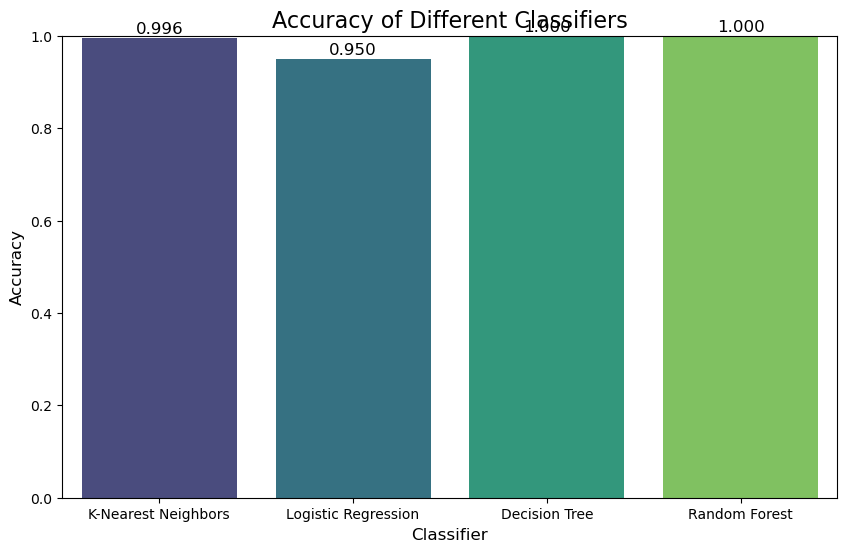

In [14]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy of Different Classifiers', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Classifier', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=12)
plt.show()

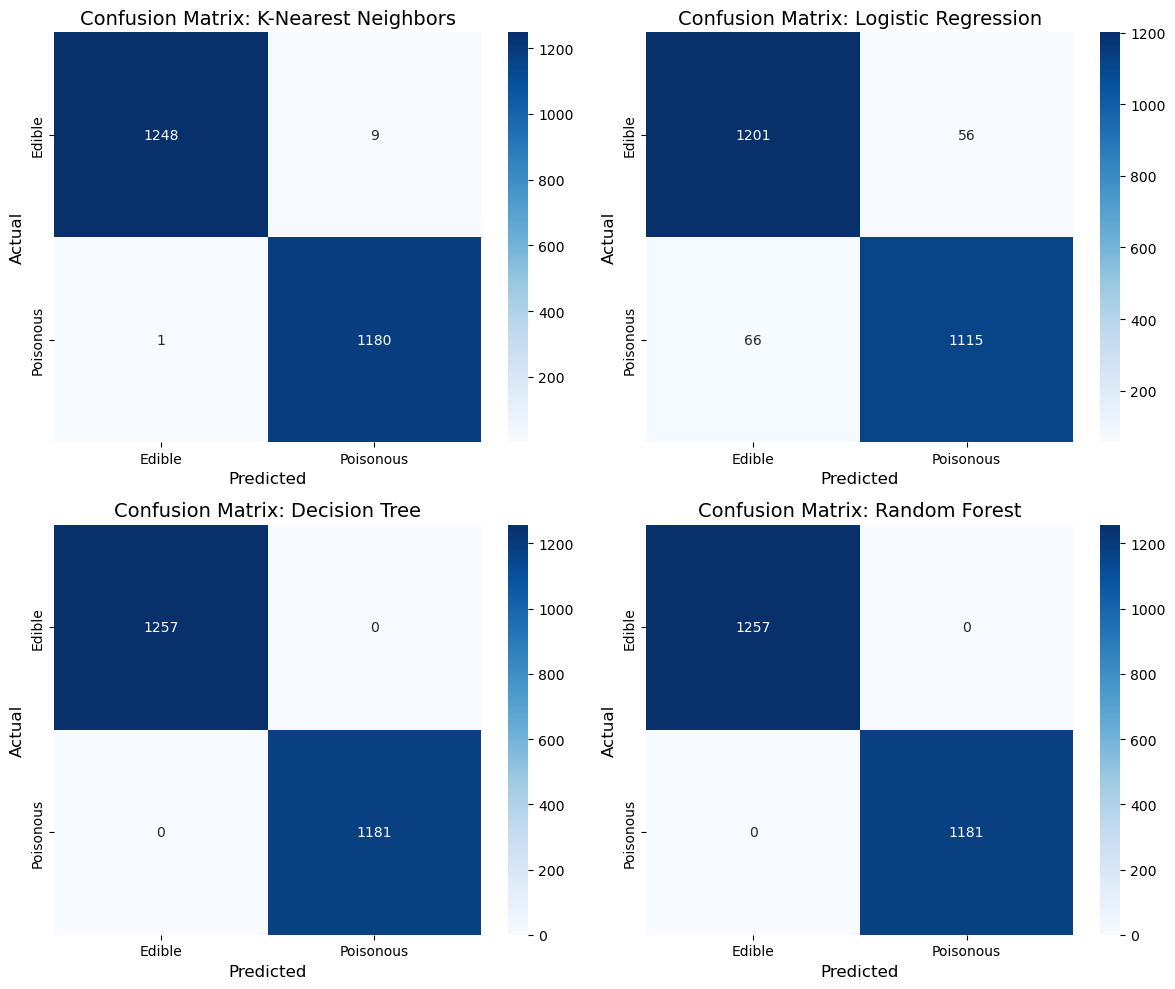

In [15]:
# Confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix: {name}', fontsize=14)
    axes[idx].set_xlabel('Predicted', fontsize=12)
    axes[idx].set_ylabel('Actual', fontsize=12)
    axes[idx].set_xticklabels(['Edible', 'Poisonous'])
    axes[idx].set_yticklabels(['Edible', 'Poisonous'])
plt.tight_layout()
plt.show()

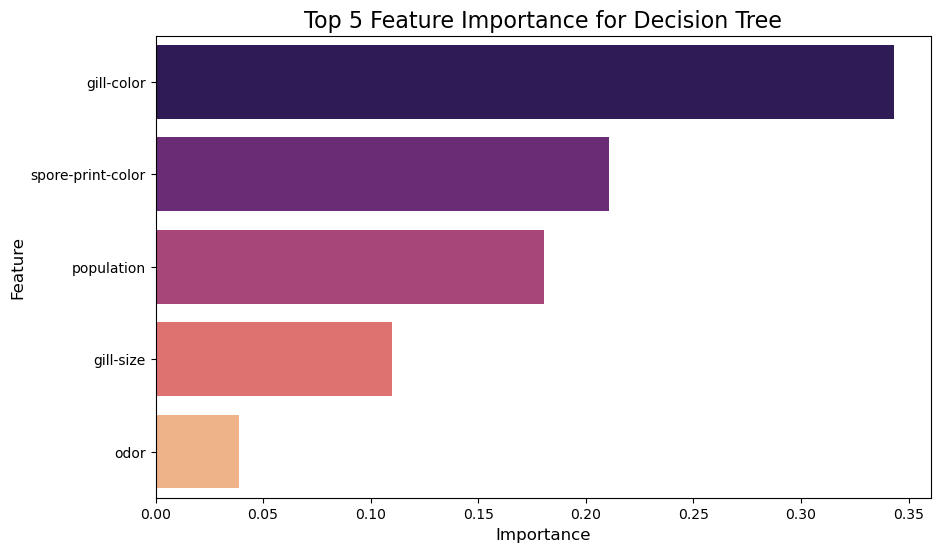

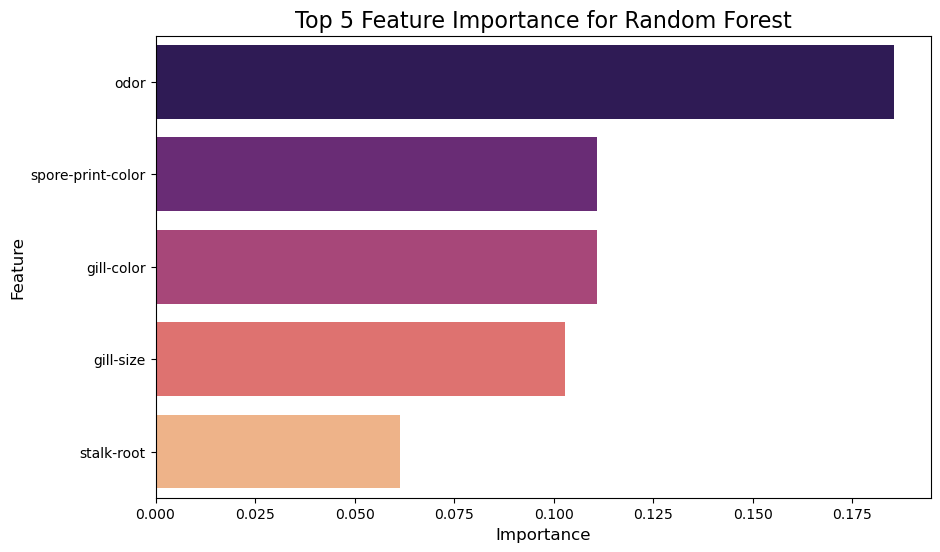

In [16]:
# Feature Importance for Decision Tree and Random Forest
for name, clf in classifiers.items():
    if name in ['Decision Tree', 'Random Forest']:
        feature_importance = clf.feature_importances_
        feature_names = X.columns
        
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
        plt.title(f'Top 5 Feature Importance for {name}', fontsize=16)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.show()

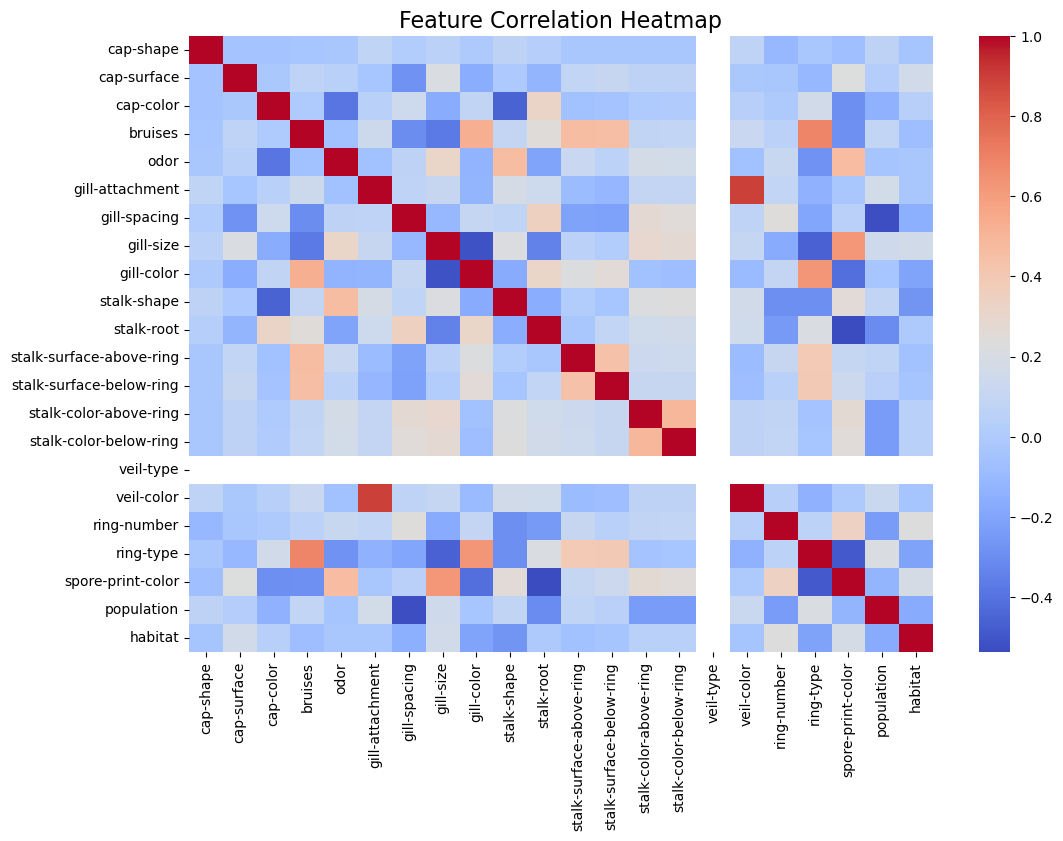

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()